In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import csv


In [2]:
bj_data_to_load = os.path.join("/Users/anirbanmukherjee/Desktop/Anaconda/UNC_Project1/Team_Carolina/Project data","blkjckhands.csv")

#print(bj_data_to_load)

In [3]:
bj_data = pd.read_csv(bj_data_to_load)
bj_data.head()

,Unnamed: 0,PlayerNo,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,...,dealcard4,dealcard5,sumofdeal,blkjck,winloss,plybustbeat,dlbustbeat,plwinamt,dlwinamt,ply2cardsum
0,0,Player1,7,10,0,0,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,17
1,1,Player2,10,9,0,0,0,19,10,8,...,0,0,18,nowin,Win,Plwin,Beat,20,0,19
2,2,Player3,9,8,0,0,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,17
3,3,Player4,2,10,0,5,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,12
4,4,Player5,10,2,0,5,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,12


In [4]:
#c.describe()

In [5]:
bj_data["start_hand"] = bj_data["card1"] + bj_data["card2"]
bj_data_ren = bj_data.rename(columns={"PlayerNo" : "player_no"})
bj_data_ren.head()

,Unnamed: 0,player_no,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,...,dealcard5,sumofdeal,blkjck,winloss,plybustbeat,dlbustbeat,plwinamt,dlwinamt,ply2cardsum,start_hand
0,0,Player1,7,10,0,0,0,17,10,8,...,0,18,nowin,Loss,Beat,Dlwin,0,10,17,17
1,1,Player2,10,9,0,0,0,19,10,8,...,0,18,nowin,Win,Plwin,Beat,20,0,19,19
2,2,Player3,9,8,0,0,0,17,10,8,...,0,18,nowin,Loss,Beat,Dlwin,0,10,17,17
3,3,Player4,2,10,0,5,0,17,10,8,...,0,18,nowin,Loss,Beat,Dlwin,0,10,12,12
4,4,Player5,10,2,0,5,0,17,10,8,...,0,18,nowin,Loss,Beat,Dlwin,0,10,12,12


In [6]:
#organize data frame 
#bj_data_1 = []
bj_data_1 = bj_data_ren[["start_hand", "winloss"]]
bj_data_2 = pd.DataFrame(bj_data_1)

bj_data_2.head()

,start_hand,winloss
0,17,Loss
1,19,Win
2,17,Loss
3,12,Loss
4,12,Loss


In [7]:
game = []
prob_win = []
prob_loss = []
x = 0
y=0
win = 0
loss = 0
#print (win)
for row in bj_data_2.iterrows():
#         print(row['winloss'])
    if x > 5: 
        y= y+1
        game.append(y)
        prob_win.append(win/6)
        prob_loss.append(loss/6)
        win = 0
        loss = 0
        x = 0
        if row[1]['winloss'] == "Win":
            win = win+1
        elif row[1]['winloss'] == "Push":
            win = win+1
        else:
            loss = loss+1
        
    else:        
        if row[1]['winloss'] == "Win":
            win = win+1
        elif row[1]['winloss'] == "Push":
            win = win+1
        else:
            loss = loss+1
        
    x = x+1 
#print(game)
    
lst_games = list(zip(game, prob_win, prob_loss))
probability = pd.DataFrame(lst_games, columns = ["game","win","loss"])
probability.head()

,game,win,loss
0,1,0.166667,0.833333
1,2,1.000000,0.000000
2,3,1.000000,0.000000
3,4,0.500000,0.500000
4,5,0.333333,0.666667


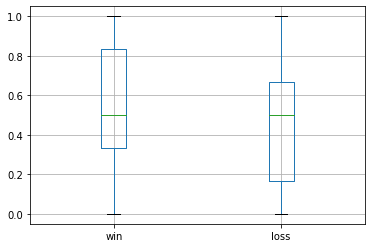

In [8]:
myfig = plt.figure()
boxplot = probability.boxplot(column = ['win','loss'])
myfig.savefig("boxplot.png")


In [8]:
start = bj_data_2.pivot_table(index = "start_hand", columns = "winloss", aggfunc='size', fill_value = 0)
start.head()

winloss,Loss,Push,Win
start_hand,,,
2,984,91,524
3,2609,201,1241
4,6320,521,3336
5,10350,970,5327
6,13808,1388,7123


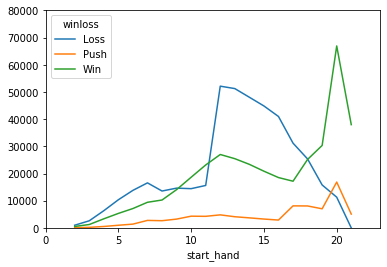

In [9]:
start.plot.line()
plt.ylim(0, 80000)
plt.xlim(0, 23)
plt.show()